In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration


This assignment is to predict the values of the sale price by applying regression models

- analysis the correlation of features, choose the features with correlation index larger than 0.2
- dealing with categorical data
- dealing with missing data


In [160]:
# DATA: House Price Prediction

data = pd.read_csv("data.csv")
originalData = data.copy()
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [161]:
Y = data["SalePrice"]
X = data.drop("SalePrice", axis=1)

X.drop("Id", axis=1, inplace=True)

In [162]:
# Uncomment to see the scatter matrix
# pd.plotting.scatter_matrix(X, figsize=(100, 100))

## Data Cleaning

Pleas see: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php


### Missing Data (finding and replacing)


In [163]:
# # Drop columns with more than 50% missing values
X.dropna(thresh=0.5 * len(X), axis=1, inplace=True)

# Impute numerical columns
from sklearn.impute import SimpleImputer

cols = X.select_dtypes(include=[np.number]).columns
X[cols] = SimpleImputer(strategy="mean").fit_transform(X[cols])

### Categorical Data (removing or replacing them)


In [164]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Impute categorical columns
cols = X.select_dtypes(include=[object]).columns
X[cols] = SimpleImputer(strategy="most_frequent").fit_transform(X[cols])

# One hot encode categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)
encoded = pd.DataFrame(
    encoder.fit_transform(X[cols]), columns=encoder.get_feature_names_out(cols)
)


# Replace categorical columns with encoded columns
X.drop(cols, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

## Correlation


In [174]:
# Find features with correlation to sale price > 0.2
correlation = pd.concat([X, Y], axis=1).corr()

features = correlation["SalePrice"]
features = features[features > 0.2]
features.drop("SalePrice", inplace=True)


X = X[features.index]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   float64
 2   OverallQual            1460 non-null   float64
 3   YearBuilt              1460 non-null   float64
 4   YearRemodAdd           1460 non-null   float64
 5   MasVnrArea             1460 non-null   float64
 6   BsmtFinSF1             1460 non-null   float64
 7   BsmtUnfSF              1460 non-null   float64
 8   TotalBsmtSF            1460 non-null   float64
 9   1stFlrSF               1460 non-null   float64
 10  2ndFlrSF               1460 non-null   float64
 11  GrLivArea              1460 non-null   float64
 12  BsmtFullBath           1460 non-null   float64
 13  FullBath               1460 non-null   float64
 14  HalfBath               1460 non-null   float64
 15  TotR

## Heatmap


<Axes: >

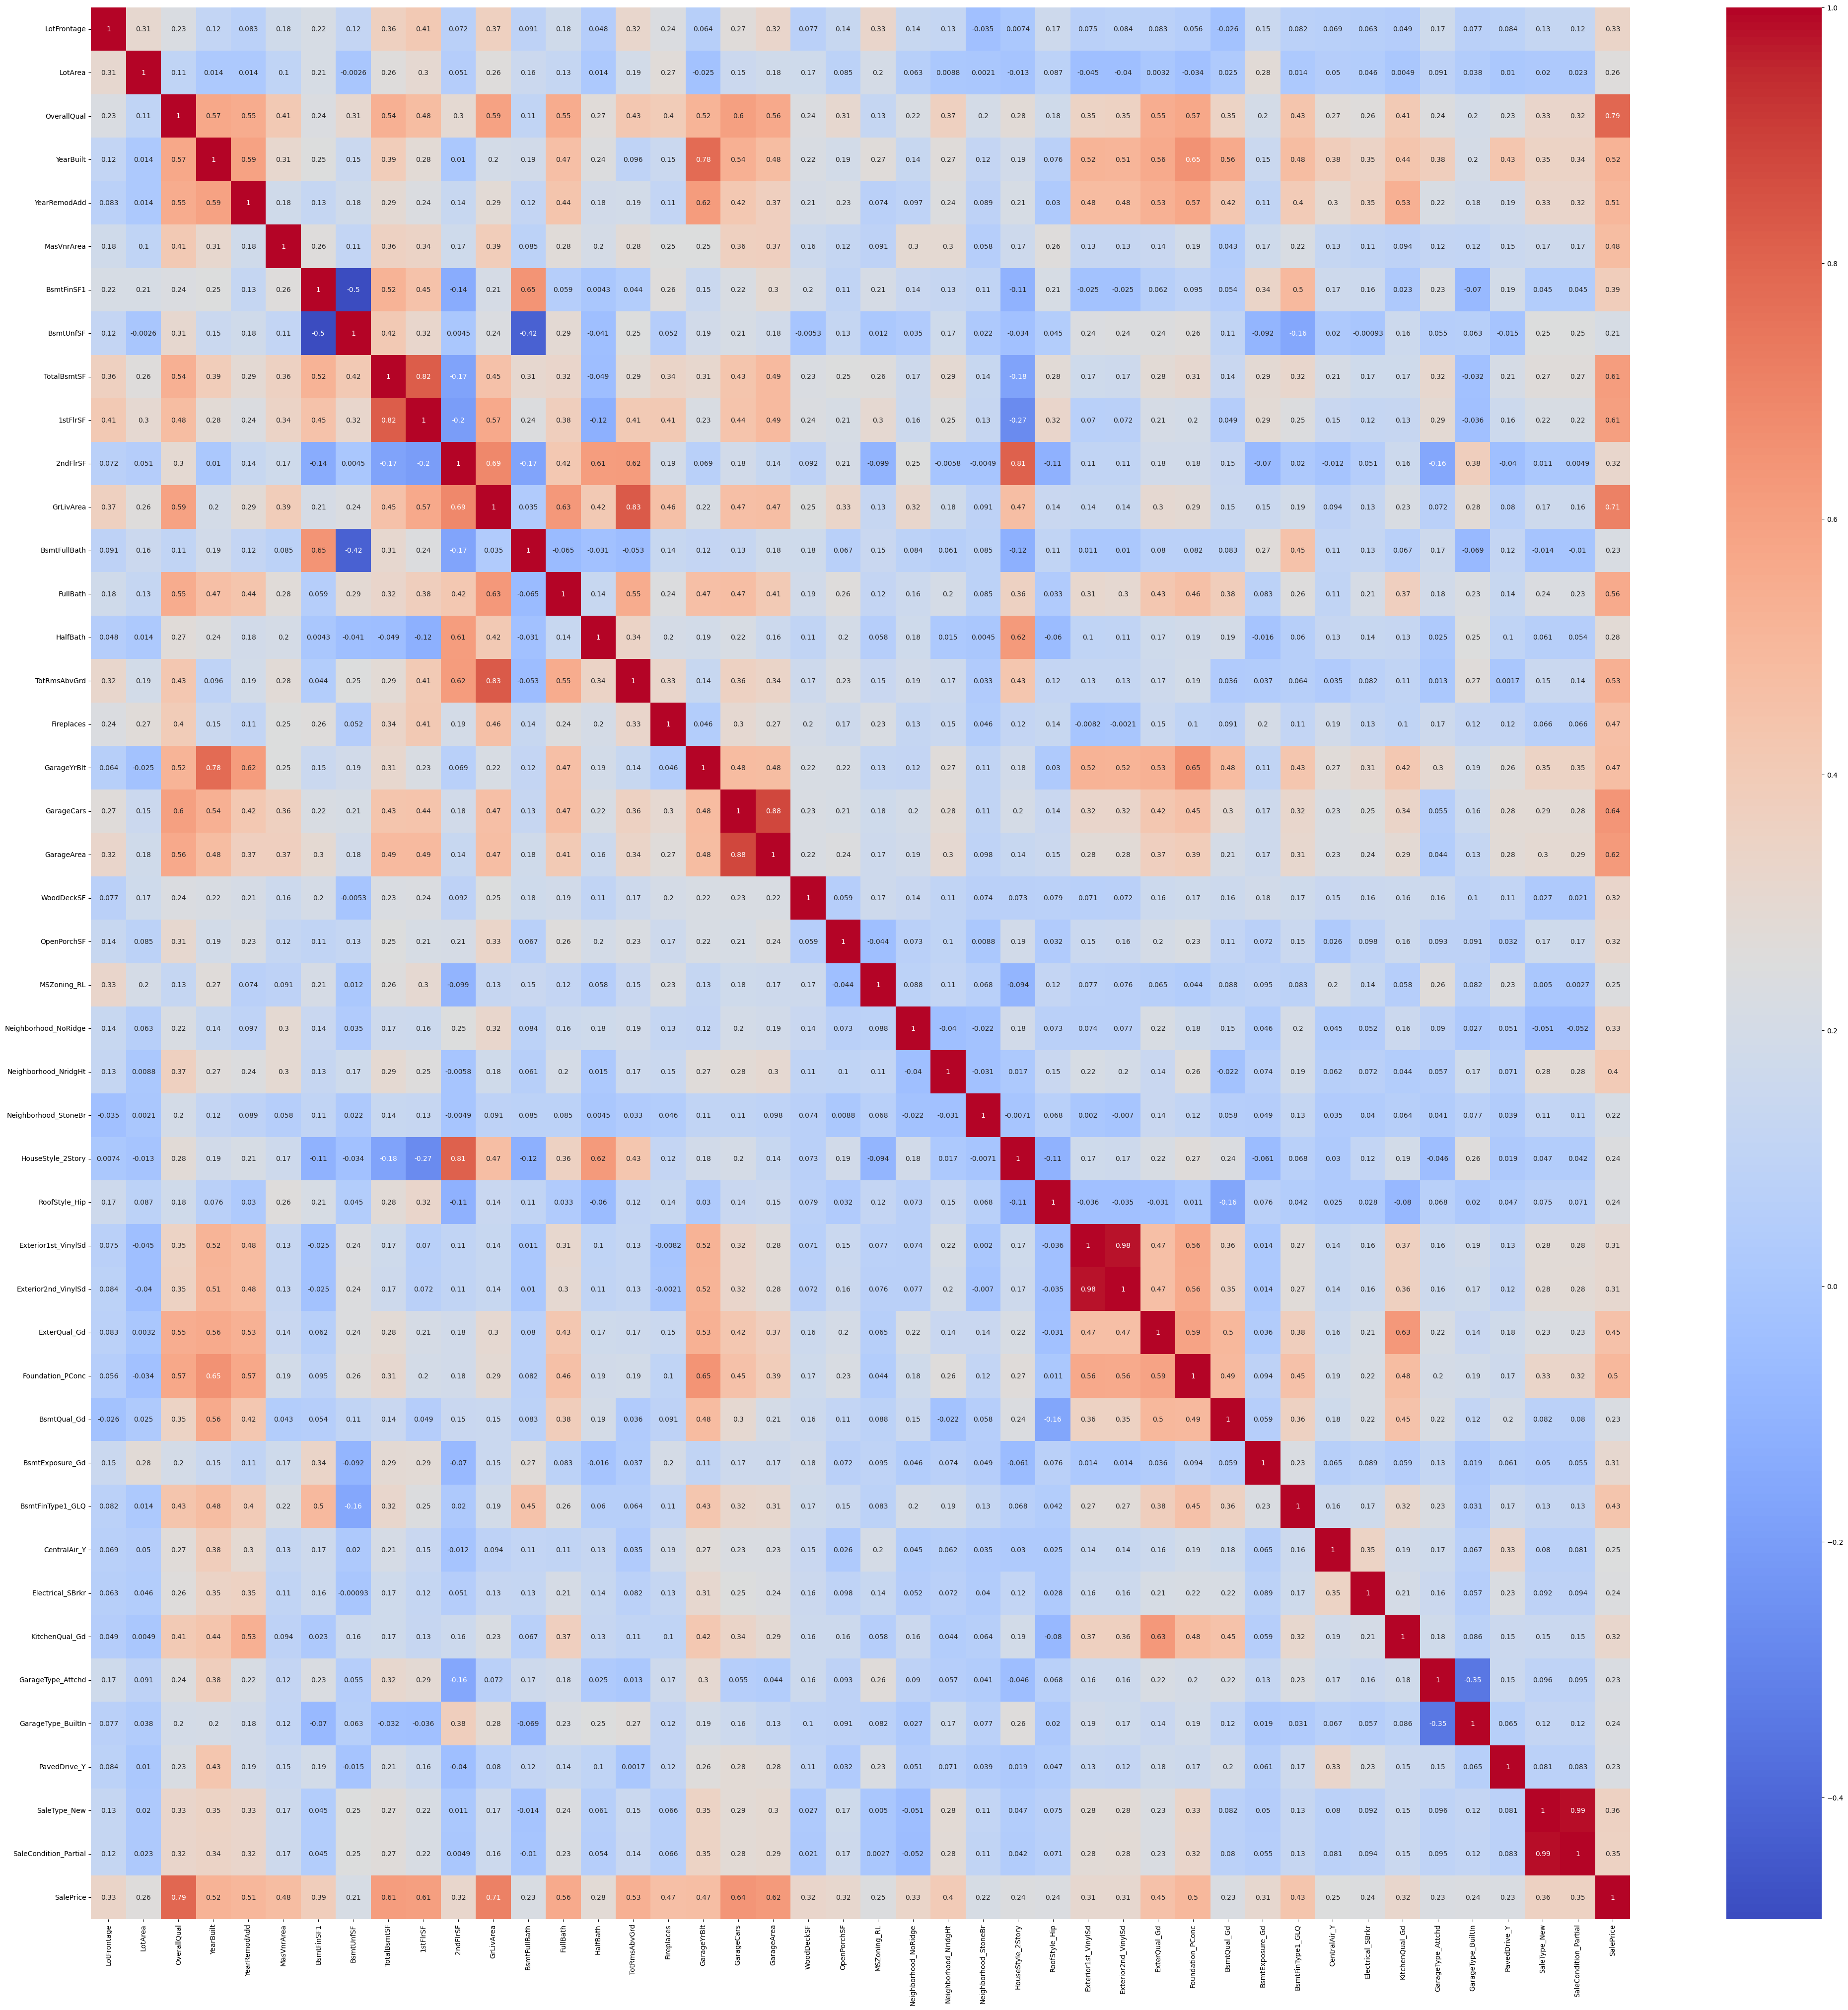

In [176]:
# heatmap
plt.figure(figsize=(50, 50))

correlation = pd.concat([X, Y], axis=1).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

# Linear Regression


Please answer the following questions:

1. what is linear regression?

**Linear regression** is a model that assumes a linear relationship between input variables ($x$ o _Features_) and a single output variable ($y$), where the output variable ($y$) can be calculated from a linear combination of the input variables ($x$). [In class definition]

2. why we choose the linear regression model?

**Linear regression** is a simple model which is easy to understand and interpret. It is a good starting point for regression tasks. It is also a good model to use when the relationship between the input and output variables is approximately linear.


In [167]:
# data preperation (split ...)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [168]:
# linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [169]:
# evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Y_pred = model.predict(X_test)


def printScores(Y_test, Y_pred):
    print("MAE: ", mean_absolute_error(Y_test, Y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(Y_test, Y_pred)))
    print("R2 Score: ", r2_score(Y_test, Y_pred))


printScores(Y_test, Y_pred)

MAE:  20870.000107631076
RMSE:  33504.82675571992
R2 Score:  0.8536472392948621


3.  what are scaling techniques?

**Scaling** is a technique used to normalize the range of independent variables or features of data. It is generally useful to normalize the input data before feeding it to the model. There are two common scaling techniques: **Standardization** and **Normalization**. Standardization is the process of rescaling the features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. Normalization is the process of scaling individual samples to have unit norm.

Using two scaling method to train the linear regression again.\
Comment on the differences (if any) in the results.

Comments:

- The results of the model trained with the scaled data are better than the model trained with the unscaled data.

- The results of the normalized data are significantly worse than the results of the standardized data and the unscaled data.


In [170]:
# Using normalization

from sklearn.preprocessing import Normalizer

scaler = Normalizer()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

printScores(Y_test, Y_pred)

MAE:  28456.443703880435
RMSE:  46459.26978989764
R2 Score:  0.7185955732380708


In [171]:
# Using Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

model = LinearRegression()
model.fit(X_train_std, Y_train)

Y_pred = model.predict(X_test_std)

printScores(Y_test, Y_pred)

MAE:  20870.000107630814
RMSE:  33504.82675571879
R2 Score:  0.853647239294872


# Logistic Regression


Please answer the following questions:

1. what is logistic regression?

Logistic regression is a classification method used to assign observations to a discrete set of classes. The method is similar to linear regression with the difference that, instead of outputing continuous values, logistic regression generates outputs over a discrete set of values (classes, categories). To determine the classes, logistic regression uses a function (sigmoid, softmax) to map a probabilistic output to two or more discrete classes. [In class definition]

2. why we use the logistic regression model?

Logistic regression is a simple model that is easy to understand and interpret. It is a good starting point for classification tasks. It is also a good model to use when the relationship between the input and output variables is approximately linear. It allows us to predict the probability of an observation belonging to a particular class.

Please assume: if the sale price is less than 200,000 - label 0, otherwise - label 1.


In [177]:
# data preperation (assign categories, split ...)

# We will use the same split but we will assign categories to the SalePrice column
Y = Y.apply(lambda x: 0 if x < 200000 else 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [185]:
# use function LogisticRegression()
# display precition, recall, classification_report

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import precision_score, recall_score, classification_report

print("Precision: ", precision_score(Y_test, Y_pred))
print("Recall: ", recall_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Precision:  0.8857142857142857
Recall:  0.7560975609756098
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       210
           1       0.89      0.76      0.82        82

    accuracy                           0.90       292
   macro avg       0.90      0.86      0.88       292
weighted avg       0.90      0.90      0.90       292



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
